## Airbnb data analysis

#### Loading the dataset

In [14]:
import pandas as pd

#loading the dataset
file_path = "data/Airbnb_Data.csv"
data = pd.read_csv(file_path)

print(data.columns)
#print 5 rows
print(data.head())

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...       

#### inspect the data

In [15]:
print(data.shape)
print(data.info())
print(data.describe())

(74111, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73

#### Data cleaning

In [16]:
print(data.isnull().sum())

# clean columns name which are missing 
#data.column = data.column.str.strip().lower().str.replace(' ','-')

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


#### exploratory data analysis

looking for patterns or anomolies

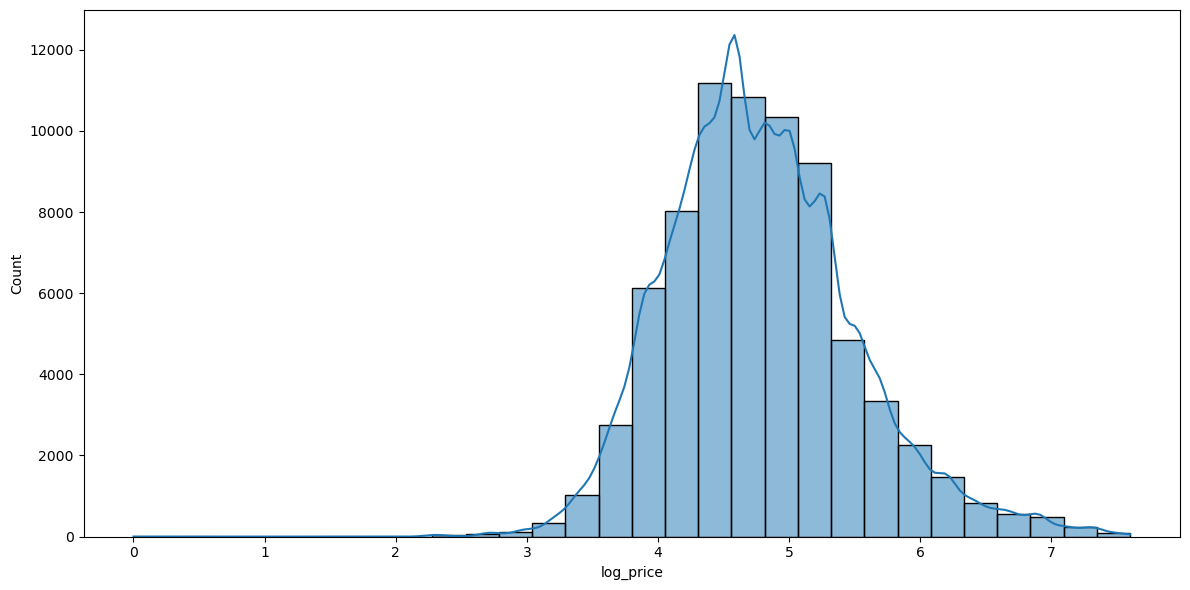

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#example: distribution of a numeric column
plt.figure(figsize=(12,6))
sns.histplot(data['log_price'], bins=30,kde=True)
plt.tight_layout()
plt.savefig("visuals/histoplot.png")
plt.show()

looking for correlation

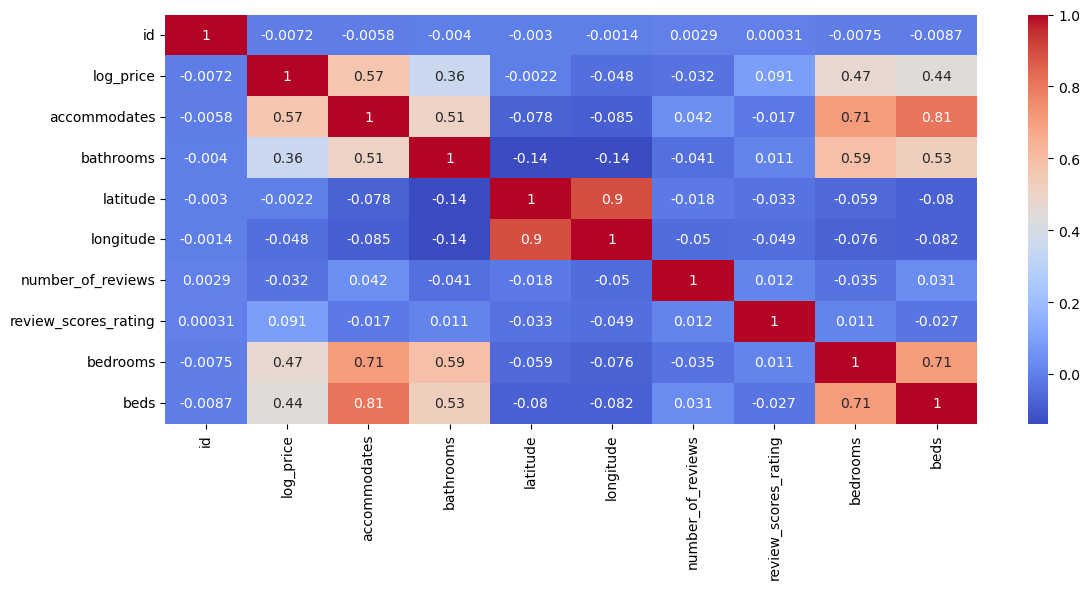

In [18]:
#filter out the non-numeric columns
# heatmap cannot be plotted with strings or characters
# omit the strings or chose only the integer or float 
numeric_data = data.select_dtypes(include=['number'])
#print("Numeric data;",numeric_data.head())

#compute the correlation matrix for numeric or columns
corr_matrix = numeric_data.corr()
#print("correlation data;",corr_matrix.head())

#plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm")
plt.tight_layout()
plt.savefig("visuals/heatmap.png")
plt.show()
plt.close()

#### Data preparation for modelling

-> Preparing the data for machine learning <br>
-> Encoding categorical variables using one-hot encoding or label encoding

In [20]:
'''
Before the Code Runs:
Your dataset has a column named property_type, which lists different types of properties (e.g., "House," "Apartment").
When You Run the Code:
The code pd.get_dummies(data, columns=['property_type'], drop_first=True):
Converts the property_type column into multiple new columns, one for each unique property type (e.g., property_type_House, property_type_Villa).
Each new column contains 1 if the row belongs to that property type, otherwise 0.
Drops the original property_type column and the first category to avoid redundancy.
After the Code Runs:
The property_type column is replaced with many binary columns (e.g., property_type_House, property_type_Boat, etc.).
Error Cause:
If you run the code again after the first time:
The original property_type column no longer exists because it was replaced by binary columns.
The code tries to find property_type in the dataset, but it doesn't exist anymore, so it raises a KeyError.'''

print(data.columns)
data = pd.get_dummies(data, columns=['property_type'], drop_first=True)

# Only run the pd.get_dummies() code once.

Index(['id', 'log_price', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_

KeyError: "None of [Index(['property_type'], dtype='object')] are in the [columns]"